In [23]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [16]:
# Load the data
(X_train, y_train), (_, _) = mnist.load_data()

In [17]:
# Select only first 2500 samples for faster training (as mentioned)
X = X_train[:2500]
y = y_train[:2500]

In [18]:
# Flatten the images: 28x28 → 784
X = X.reshape((2500, 28*28)).astype('float32') / 255

# One-hot encode the labels
y = to_categorical(y)


In [25]:
# Building your own digit recognition model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50,activation='relu',input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(50,activation='relu'))

# Add the output layer
model.add(Dense(10,activation='softmax'))

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#
early_stop_monitor=EarlyStopping(patience=1)

# Fit the model
model_training=model.fit(X,y,validation_split=0.3,epochs=10,callbacks=[early_stop_monitor])

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4171 - loss: 1.9269 - val_accuracy: 0.7853 - val_loss: 0.8524
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8272 - loss: 0.7064 - val_accuracy: 0.8507 - val_loss: 0.5100
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8910 - loss: 0.4083 - val_accuracy: 0.8707 - val_loss: 0.3937
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9103 - loss: 0.3292 - val_accuracy: 0.9053 - val_loss: 0.3301
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9336 - loss: 0.2536 - val_accuracy: 0.9000 - val_loss: 0.3108
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9459 - loss: 0.2167 - val_accuracy: 0.9013 - val_loss: 0.3020
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9601 - loss: 0.1627 - val_accuracy: 0.9027 - val_loss: 0.3039


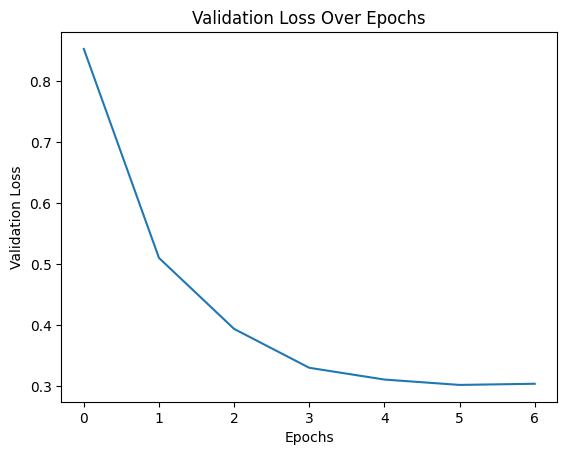

In [26]:
# Plot the validation loss
plt.plot(model_training.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Over Epochs')
plt.show()

In [27]:
model.save('mnist_model.h5')

In [28]:
# New dataset
(_, _), (X_test, y_test) = mnist.load_data()
X_test = X_test[:500].reshape((500, 28*28)).astype('float32') / 255
y_test = to_categorical(y_test[:500])
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9131 - loss: 0.3160 
Test accuracy: 0.8840000033378601


In [29]:
model.save('mnist_model_test.h5')